In [1]:
Nfft=1024;  #Number of frequency bands
P=4;        #PFF taps

import numpy as np
import matplotlib.pyplot as plt
Nf2=Nfft//2;

#Load polyphase filter coefficients
W=np.load("coef4_%i_%i.npy" % (Nfft,P)).reshape([P,Nfft])
WI=W[::-1,:]

#Functions to calculate PFF and inverse PFF
def fftw(A,W,P):
  Nfft=A.shape[-1]
  Dx=A[:-P,:]*W[0]
  for i in range(1,P): Dx+=A[i:-P+i,:]*W[i]
  return np.fft.fft(Dx,axis=1,norm='ortho')

def ifftw(A1,W,P):
  A=np.fft.ifft(A1,axis=1,norm='ortho')
  Nfft=A.shape[-1]
  Dx=A[:-P,:]*W[0]
  for i in range(1,P): Dx+=A[i:-P+i,:]*W[i]
  return Dx

#some helper functions
def linroll(F,shift):
    n1,n2=F.shape
    return np.roll(F.reshape([n1*n2]),shift).reshape([n1,n2])
def P2dB(X): return 10*np.log10(X)

In [98]:
x0=np.arange(P*Nfft)/P
x=x0-Nfft*(x0>Nfft//2)
#Fw2=(np.abs(x)<0.1875)*1.;
#Fw1=(np.abs(x)<0.375)*1.;
#Fw1[P//2-1]=0.5
#Fw1[-P//2+1]=0.5
#Fw2[P//4-1]=0.5
#Fw2[-P//4+1]=0.5
#print(Fw1[:10],Fw1[-10:])
#print(Fw2[:10],Fw2[-10:])
#W1=np.fft.ifft(Fw1,norm='ortho')
#W2=np.fft.ifft(Fw2,norm='ortho')
#W1=np.roll(W1,P*Nfft//2)#.reshape([P,Nfft])
#W2=np.roll(W2,P*Nfft//2)#.reshape([P,Nfft])
##W2*=np.exp(2j*np.pi*np.arange(0,P*Nfft)/Nfft*0.5)
#W2=W2.reshape([P*Nfft])*np.exp(2j*np.pi*np.arange(0,P*Nfft)/Nfft/2)
#W1=W1.reshape([P,Nfft])
#W2=W2.reshape([P,Nfft])
W1=linroll(W,-Nfft//4)
W2=linroll(W,Nfft//4)
W1I=W1[::-1,:]
W1I=W2[::-1,:]


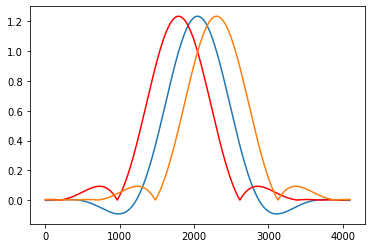

In [99]:
plt.plot((W).reshape([P*Nfft]))
plt.plot(np.abs(W1).reshape([P*Nfft]),'r')
plt.plot(np.abs(W2).reshape([P*Nfft]))


In [100]:
#plt.plot(np.angle(W).reshape([P*Nfft]))
#t=np.arange(P*Nfft)/Nfft
#plt.plot(np.angle(np.exp(2j*np.pi*t*0.5)))
#plt.plot(np.angle(W2).reshape([P*Nfft]))


C:\Users\Kruger\AppData\Local\Temp/ipykernel_18128/2306544104.py:30: RuntimeWarning: divide by zero encountered in log10
  def P2dB(X): return 10*np.log10(X)
C:\Users\Kruger\AppData\Local\Temp/ipykernel_18128/2306544104.py:30: RuntimeWarning: divide by zero encountered in log10
  def P2dB(X): return 10*np.log10(X)
C:\Users\Kruger\AppData\Local\Temp/ipykernel_18128/2306544104.py:30: RuntimeWarning: divide by zero encountered in log10
  def P2dB(X): return 10*np.log10(X)


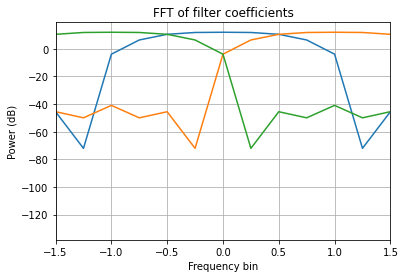

In [103]:
#Fw=np.fft.fft(W.reshape([P*Nfft]),norm='ortho')
Fw1=np.fft.fft(W1.reshape([P*Nfft]),norm='ortho')
Fw2=np.fft.fft(W2.reshape([P*Nfft]),norm='ortho')
#plt.plot(x,P2dB(np.abs(Fw)),'b-')
x2=np.roll(x,Nfft//2)
Fw1=np.roll(Fw1,Nfft//2)
plt.plot(x2,P2dB(np.abs(Fw1)))
plt.plot(x2+1,P2dB(np.abs(Fw1)))
plt.plot(x2-1,P2dB(np.abs(Fw1)))
#plt.plot(x,P2dB(np.abs(Fw2)),'r-')
#plt.plot(x,(np.angle(Fw)/np.pi*180),'bx')
#plt.plot(x,(np.angle(Fw2)/np.pi*180),'rx')
plt.xlim(-1.5,1.5)
plt.grid()
plt.xlabel('Frequency bin');plt.ylabel("Power (dB)");plt.title('FFT of filter coefficients')
plt.savefig("FFTfilter.png")

In [210]:
Nb=1024*8+4*P;
Nt=Nb*Nfft;
t=np.arange(Nt)/Nfft

S=np.random.normal(scale=1,size=Nt)
for x in range(25):
 S+=np.cos(2*np.pi*t*(6+x/50))*10*np.random.rand()+np.sin(2*np.pi*t*(6+x/50))*10*np.random.rand()
# S+=np.cos(2*np.pi*t*6.15)*1e2
# S+=np.cos(2*np.pi*t*(6.3125))*1e2


In [211]:
Si=np.round(S*3);
print(Si)
print('Bits DR:',np.log(np.max(np.abs(Si)))/np.log(2))


[440. 445. 463. ... -41. -46. -39.]
Bits DR: 9.221587121264806


Text(0, 0.5, 'Power (dB)')

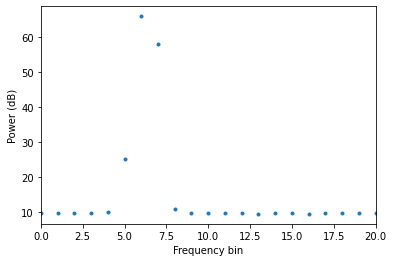

In [212]:
F=fftw(Si.reshape([Nb,Nfft]),W,P)
F2=fftw(np.roll(Si,Nfft//2).reshape([Nb,Nfft]),W,P)#[::2,:]
Fp=np.mean((F*F.conj()).real,axis=0)
Fp2=np.mean((F2*F2.conj()).real,axis=0)
plt.plot(P2dB(Fp),'.')
#plt.plot(P2dB(Fp2))
#plt.plot(P2dB(Fp3))
plt.xlim(0,20)
plt.xlabel("Frequency bin")
plt.ylabel("Power (dB)")

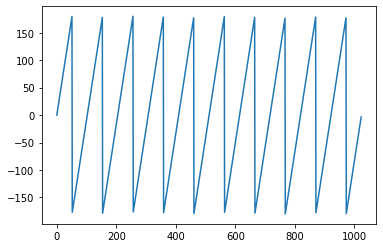

In [213]:
delay=10 #samples (about 15m on 200MSPS)
xt=np.arange(Nfft)/Nfft
xt-=1*(xt>0.5)
Fd=np.exp(2j*np.pi*xt*delay)
plt.plot(np.angle(Fd)/np.pi*180)
#plt.xlim(0,10)

In [224]:
#msk=(np.arange(Nfft)+(np.arange(Nfft)>Nfft//2))%2
msk=((np.arange(Nfft))%2)==0
mski=1-msk
print(msk,mski)

Fm=  (F*Fd*msk).real+(F*Fd*mski).imag*1j
F2m=(F2*Fd*msk).imag*1j+(F2*Fd*mski).real
#Fm=  (F*msk).real+(F*mski).imag*1j
#F2m=(F2*msk).imag*1j+(F2*mski).real

#Ftx=Fm+F2m
#Ftx*=Fd
#Fm =(Ftx*msk).real+(Ftx*mski).imag*1j
#F2m=(Ftx*mski).real+(Ftx*msk).imag*1j
#print(Fm)
Fm=F*Fd/2
F2m=F2*Fd/2

Fm=np.round(Fm*4)/4
F2m=np.round(F2m*4)/4
print('Bits DR:',np.log(4*np.max(np.real(Fm)))/np.log(2))
#print(Fm)
#print(F2m)

[ True False  True ... False  True False] [0 1 0 ... 1 0 1]
Bits DR: 13.985486199104635


[  67.3052046 +0.j   62.41517819+0.j   61.60687014+0.j ...
 -211.89908972+0.j -209.87453032+0.j -209.27396526+0.j]
(8388608,)
8388608 23.0
0 8388608 23.0


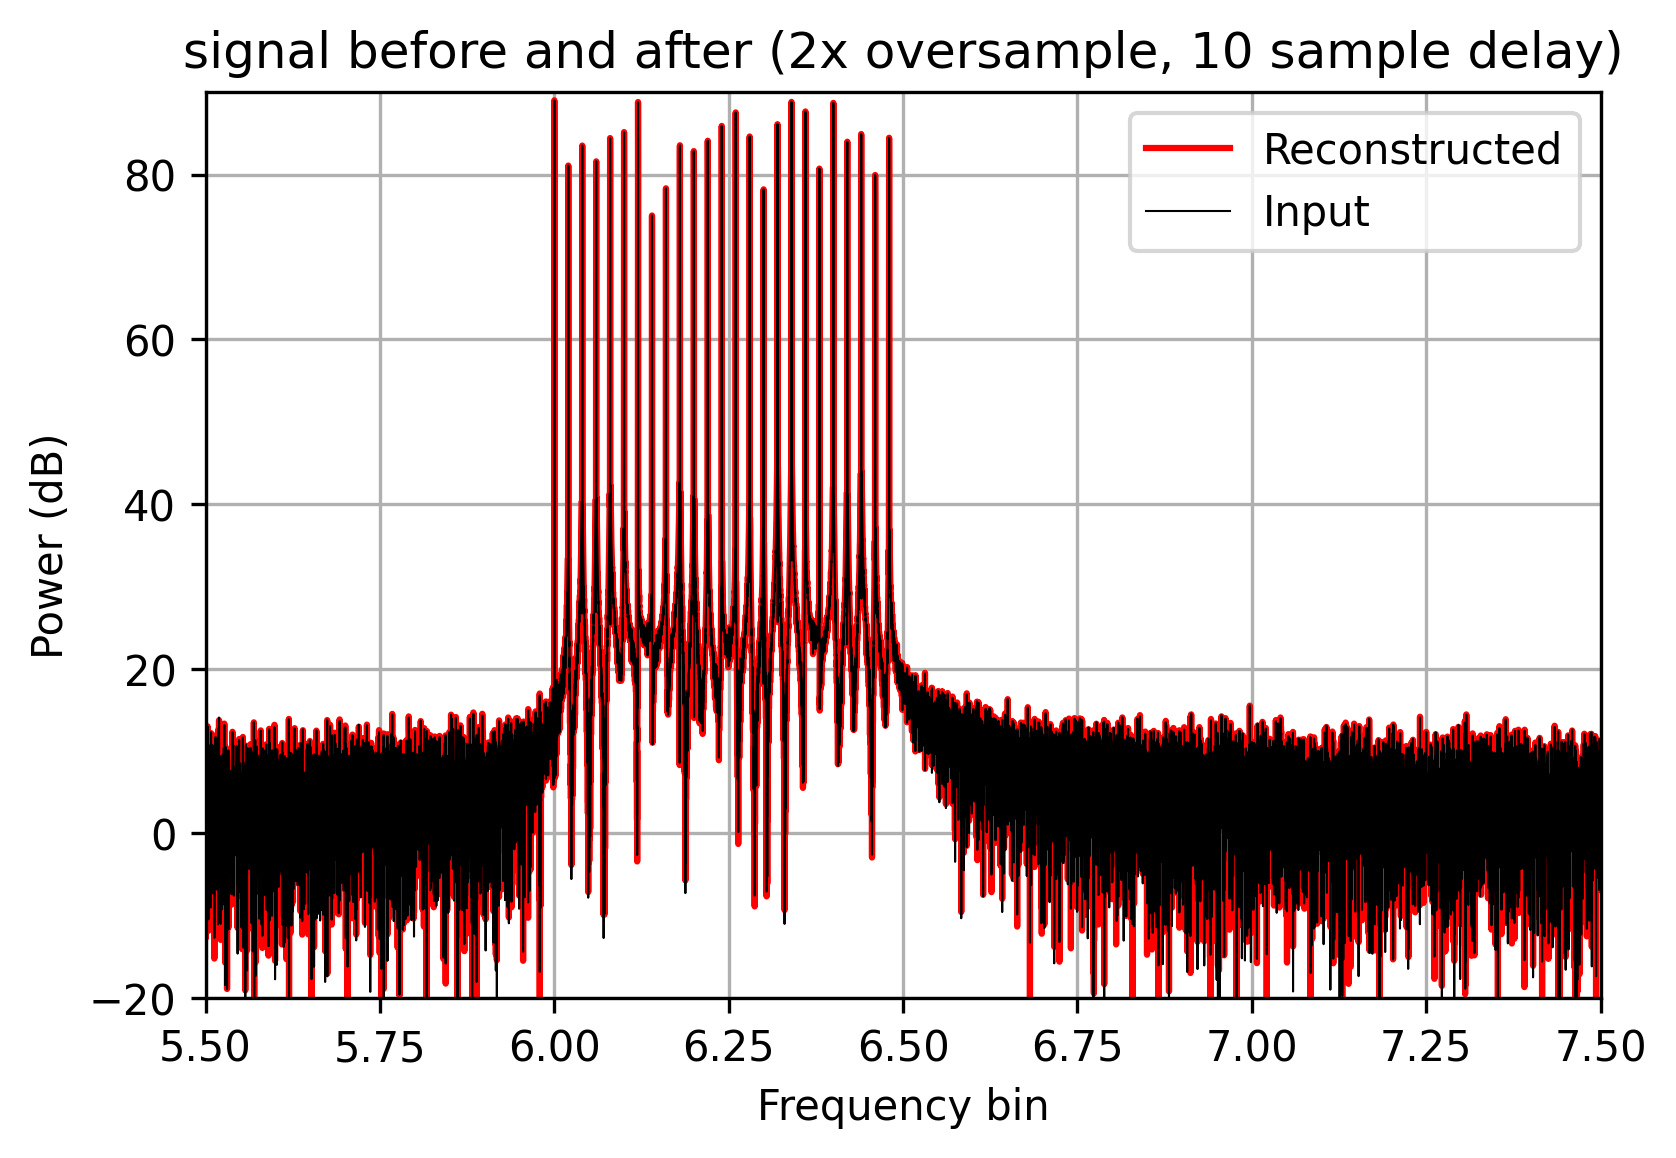

In [225]:

R1=ifftw(Fm,WI,P)
R2=ifftw(F2m,WI,P)
R1=linroll(R1,Nfft//2)
Sr=R1+R2
n1,n2=Sr.shape
Sr=Sr.reshape(n1*n2)
Sr=Sr[P*Nfft:-P*Nfft]
print(Sr)
print(Sr.shape)
n1,=Sr.shape
print(n1,np.log(n1)/np.log(2))

plt.figure(dpi=300)
Fr=np.fft.fft(Sr*np.hamming(n1))
Pr=(Fr*Fr.conj()).real
xr=np.arange(n1)/n1*Nfft
plt.plot(xr,P2dB(Pr)-70,'r',label='Reconstructed');

S2=Si[2*P*Nfft-Nfft//2-Nfft:-2*P*Nfft-Nfft//2-Nfft]
n2,=S2.shape
print(n1-n2,n2,np.log(n2)/np.log(2))
Fs=np.fft.fft(S2*np.hamming(n2))
Ps=(Fs*Fs.conj()).real
xs=np.arange(n2)/n2*Nfft
plt.plot(xs,P2dB(Ps)-70,'k',linewidth=0.5,label='Input');


plt.xlim(5.5,7.5)
plt.grid()
plt.ylim(-20,90)
plt.xlabel("Frequency bin");plt.ylabel("Power (dB)");plt.title("signal before and after (2x oversample, 10 sample delay)")
plt.legend(loc='upper right')
plt.savefig("Responce10s.png")

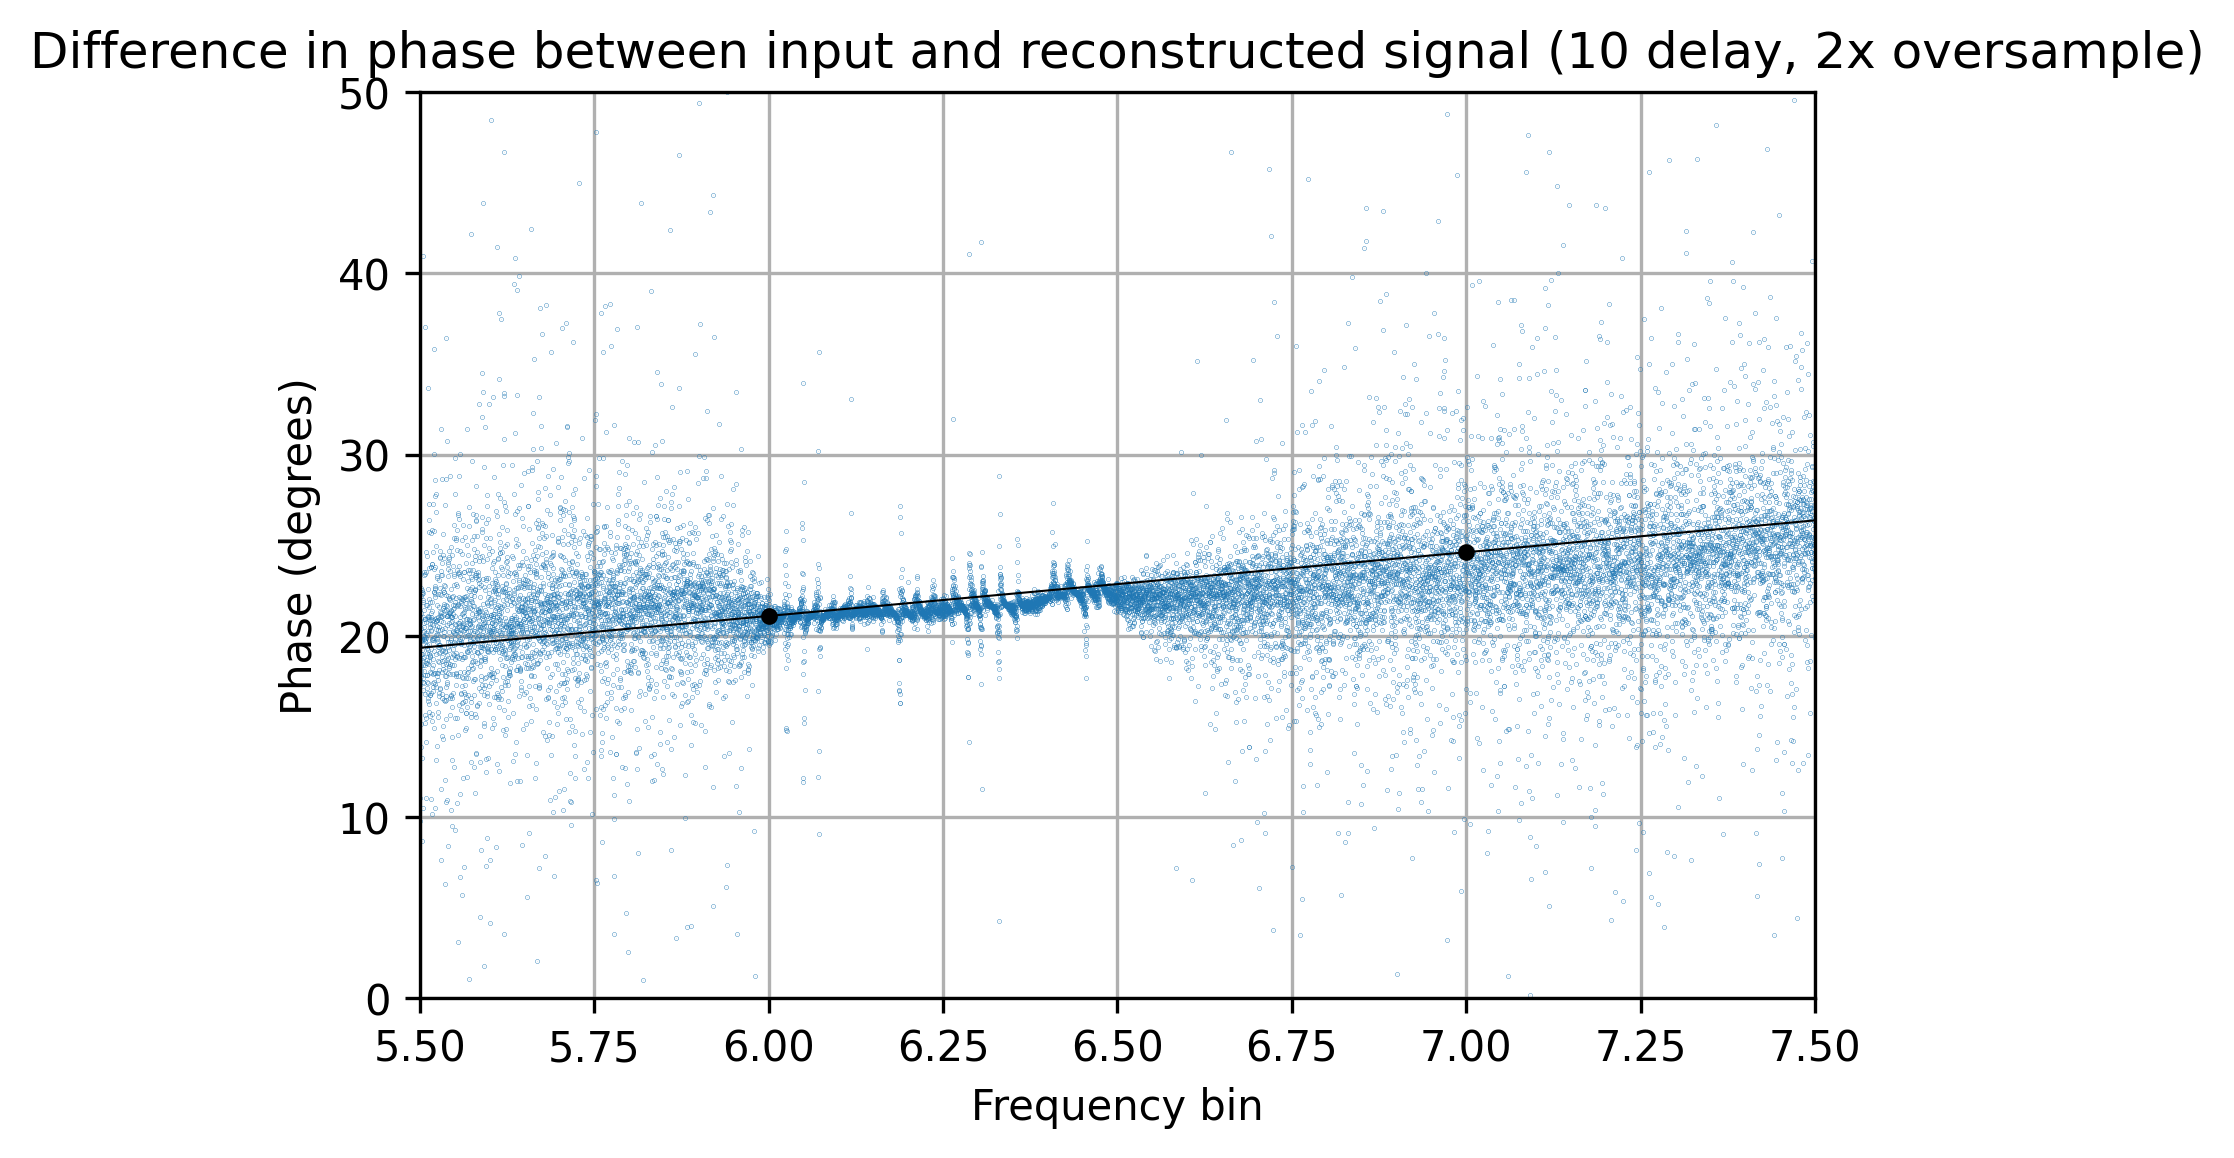

In [226]:
plt.figure(dpi=300)
plt.plot(xr[:70000],np.angle(Fr[:70000]/Fs[:70000])/np.pi*180,'.',markersize=0.2,label='Reconstructed');
Mask=(P2dB(Pr[:70000])-60)>75;
#plt.plot(xr[:60000],np.angle(Fr[:60000]/Fs[:60000])/Mask,'x');
plt.plot(np.angle(Fd)/np.pi*180,'k-',linewidth=0.5)
plt.plot(np.angle(Fd)/np.pi*180,'k.')
#plt.plot(xr[:60000],np.angle(Fr)[:60000],label='Reconstructed');
#plt.plot(xs[:60000],np.angle(Fs)[:60000],label='Input');
#plt.plot(xs,np.angle(Fs),label='input');
plt.xlim(5.5,7.5)
plt.grid()
plt.ylim(0,50)
plt.xlabel("Frequency bin")
plt.ylabel("Phase (degrees)")
plt.title("Difference in phase between input and reconstructed signal (10 delay, 2x oversample)")
plt.savefig("Phase10s.png")

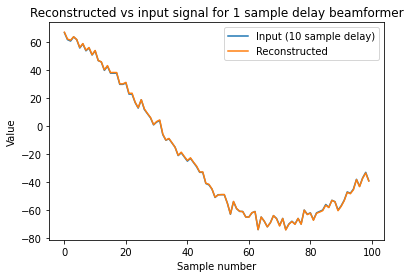

In [227]:
plt.plot(S2[10:110].real,label='Input (10 sample delay)')
plt.plot(Sr[:100].real,label='Reconstructed')
#plt.plot(Sr[:100].imag)
#plt.plot(Sr[1024*2:1024*2+10000].real)
#plt.plot(Sr[:2000].imag,'.')
#plt.plot(S2[1024:10000+1024].real)
plt.xlabel("Sample number")
plt.ylabel("Value")
plt.legend()
plt.title("Reconstructed vs input signal for 1 sample delay beamformer")
plt.savefig("Sample_recon.png")